# スペックル低減フィルタ
スペックル低減フィルタを作って実装してみる.  

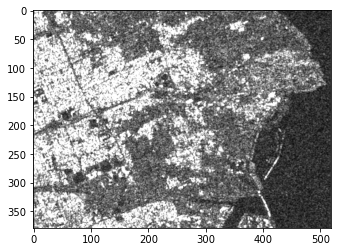

In [40]:
import cv2
import matplotlib.pyplot as plt

sar_img = cv2.imread("S1A_IW_GRDH_1SDV_20211228T210006_20211228T210031_041214_04E5DC_258C.SAFE/subset_2_of_subset_1_of_geotiff_band_1_konan_zoom.bmp")

plt.imshow(sar_img)

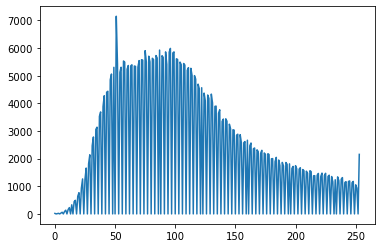

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
#img = cv2.imread(sar_img, 0)

# ヒストグラムの取得
img_hist, img_bins = np.histogram(np.array(sar_img).flatten(), bins=np.arange(255))

# ヒストグラムの表示
plt.plot(img_hist)
plt.show()

In [72]:
from PIL import Image
import numpy as np

img_array = Image.open("S1A_IW_GRDH_1SDV_20211228T210006_20211228T210031_041214_04E5DC_258C.SAFE/subset_2_of_subset_1_of_geotiff_band_1_konan_zoom.bmp")

# print(type(img_array))
# <class 'numpy.ndarray'>

print(img_array.size)
# uint8

# print(img_array.shape)
# print(img_array.ndim)
# (225, 400, 3)

(518, 379)


## 局所統計フィルタ

In [74]:

import math

width, height = img_array.size
print("横",width,"縦",height)

win_size = 5
#sig = 1/math.sqrt(win_size)
#sig=0.7

img_output = img_array

r_tmp = np.full((win_size, win_size), 0).tolist()
g_tmp = np.full((win_size, win_size), 0).tolist()
b_tmp = np.full((win_size, win_size), 0).tolist()

print(r_tmp)

x = math.floor(win_size/2) + 1
y = math.floor(win_size/2) + 1
        
for y in range(height-math.floor(win_size/2)):
    #print("y:",y)
    y_tmp = y - math.floor(win_size/2)
    for x in range(width-math.floor(win_size/2)):
        #print(x)
        x_tmp = x - math.floor(win_size/2)
        
        r_sum = 0
        g_sum = 0
        b_sum = 0
        #a_sum = 0
        
        R_var_i_r = 0
        R_var_i_g = 0
        R_var_i_b = 0
        #R_var_i_a = 0
        
        for i in range(win_size):
            for i2 in range(win_size):
                r_tmp[i][i2], g_tmp[i][i2], b_tmp[i][i2] = img_array.getpixel((x_tmp+i, y_tmp+i2))
                r_sum += r_tmp[i][i2]
                g_sum += g_tmp[i][i2]
                b_sum += b_tmp[i][i2]
                
        pow_win_size = win_size**2
        r_avg = r_sum/pow_win_size
        g_avg = g_sum/pow_win_size
        b_avg = b_sum/pow_win_size
    
        for j in range(win_size):
            for j2 in range(win_size):
                R_var_i_r += (r_tmp[j][j2] - r_avg)**2
                R_var_i_g += (g_tmp[j][j2] - g_avg)**2
                R_var_i_b += (b_tmp[j][j2] - b_avg)**2
            #R_var_i_a += (a_tmp[j] - a_avg)**2
    
        R_var_i_r /= pow_win_size
        R_var_i_g /= pow_win_size
        R_var_i_b /= pow_win_size
        #R_var_i_a /= win_size
        
        try:
            sig_r = math.sqrt(R_var_i_r)/r_avg
        except ZeroDivisionError:
            sig_r = 0
        try:
            sig_g = math.sqrt(R_var_i_g)/g_avg
        except ZeroDivisionError:
            sig_g = 0
        try:
            sig_b = math.sqrt(R_var_i_b)/b_avg
        except ZeroDivisionError:
            sig_b = 0
        
        R_var_r = (R_var_i_r - r_avg**2 * sig_r**2)/(1 + sig_r**2)
        R_var_g = (R_var_i_g - g_avg**2 * sig_g**2)/(1 + sig_g**2)
        R_var_b = (R_var_i_b - b_avg**2 * sig_b**2)/(1 + sig_b**2)
        #R_var_a = (R_var_i_a - a_avg**2 * sig**2)
        
        
        try:
            r_wei = R_var_r/math.floor(r_avg**2 * sig_r**2 + (1 + sig_r**2)*R_var_r)
        except ZeroDivisionError:
            r_wei = 0
            
        try:
            g_wei = R_var_g/math.floor(g_avg**2 * sig_g**2 + (1 + sig_g**2)*R_var_g)
        except ZeroDivisionError:
            g_wei = 0
            
        try:
            b_wei = R_var_b/math.floor(b_avg**2 * sig_b**2 + (1 + sig_b**2)*R_var_b)
        except ZeroDivisionError:
            b_wei = 0
            
#         try:
#             a_wei = R_var_a/math.floor(a_avg**2 * sig**2 + (1 + sig**2)*R_var_a)
#         except ZeroDivisionError:
#             a_wei = 0
    
        r_i, g_i, b_i = img_array.getpixel((x, y))
        R_r = r_avg + r_wei*(r_i - r_avg)
        R_g = g_avg + g_wei*(g_i - g_avg)
        R_b = b_avg + b_wei*(b_i - b_avg)
        #R_a = a_avg + a_wei*(a_i - a_avg)
        
        R_r = math.floor(R_r)
        R_g = math.floor(R_g)
        R_b = math.floor(R_b)
        #R_a = math.floor(R_a)
    
        img_output.putpixel((x, y), (R_r, R_g, R_b))

# var_r = (var_i - avg_i**2*sig**2)/(1+sig**2)

# b = var_r / (avg_i*sig + (1 + sig**2)*var_r)

# r = avg_r + b*(i-avg_r)



print(img_output)

横 518 縦 379
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=518x379 at 0x1429D633B80>


(518, 379)


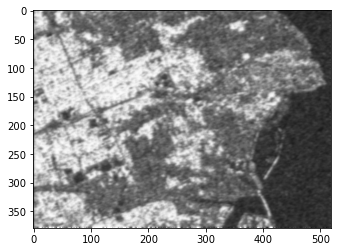

In [75]:
plt.imshow(img_output)
print(img_output.size)

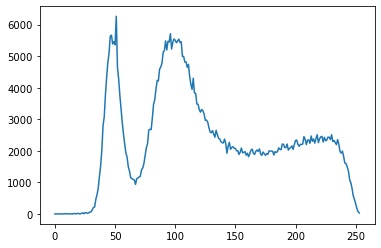

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
#img = cv2.imread(sar_img, 0)

# ヒストグラムの取得
img_hist, img_bins = np.histogram(np.array(img_output).flatten(), bins=np.arange(255))

# ヒストグラムの表示
plt.plot(img_hist)
plt.show()

___

## Hirosawaフィルタ

In [84]:
from PIL import Image
import numpy as np

img_array = Image.open("S1A_IW_GRDH_1SDV_20211228T210006_20211228T210031_041214_04E5DC_258C.SAFE/subset_2_of_subset_1_of_geotiff_band_1_konan_zoom.bmp")

# print(type(img_array))
# <class 'numpy.ndarray'>

print(img_array.size)
# uint8

# print(img_array.shape)
# print(img_array.ndim)
# (225, 400, 3)

(518, 379)


In [85]:

import math

width, height = img_array.size
print("横",width,"縦",height)

win_size = 5
#sig = 1/math.sqrt(win_size)
#sig=0.7
k = 0.45

img_output_hirosawa = img_array

#for num in range(win_size - 1):
    

# img_mean = uniform_filter(sar_img, (size, size))
# img_sqr_mean = uniform_filter(sar_img**2, (size, size))
# img_variance = img_sqr_mean - img_mean**2

# overall_variance = variance(sar_img)

# img_weights = img_variance / (img_variance + overall_variance)
# img_output = img_mean + img_weights * (img_array - img_mean)

r_tmp = np.full((win_size, win_size), 0).tolist()
g_tmp = np.full((win_size, win_size), 0).tolist()
b_tmp = np.full((win_size, win_size), 0).tolist()

#a_tmp = [0]*win_size

x = math.floor(win_size/2) + 1
y = math.floor(win_size/2) + 1
print(r_tmp)

g = 0.5

for y in range(height-math.floor(win_size/2)):
    #print("y:",y)
    y_tmp = y - math.floor(win_size/2)
    for x in range(width-math.floor(win_size/2)):
        #print(x)
        x_tmp = x - math.floor(win_size/2)
        
        r_sum = 0
        g_sum = 0
        b_sum = 0
        #a_sum = 0
        
        R_var_i_r = 0
        R_var_i_g = 0
        R_var_i_b = 0
        
        for i in range(win_size):
            for i2 in range(win_size):
                r_tmp[i][i2], g_tmp[i][i2], b_tmp[i][i2] = img_array.getpixel((x_tmp+i, y_tmp+i2))
                r_sum += r_tmp[i][i2]
                g_sum += g_tmp[i][i2]
                b_sum += b_tmp[i][i2]
                
        pow_win_size = win_size**2
        r_avg = r_sum/pow_win_size
        g_avg = g_sum/pow_win_size
        b_avg = b_sum/pow_win_size

        for j in range(win_size):
            for j2 in range(win_size):
                R_var_i_r += (r_tmp[j][j2] - r_avg)**2
                R_var_i_g += (g_tmp[j][j2] - g_avg)**2
                R_var_i_b += (b_tmp[j][j2] - b_avg)**2
            #R_var_i_a += (a_tmp[j] - a_avg)**2
    
        R_var_i_r /= pow_win_size
        R_var_i_g /= pow_win_size
        R_var_i_b /= pow_win_size
        
        try:
            CoV_r = math.sqrt(R_var_i_r)/r_avg
        except ZeroDivisionError:
            CoV_r = 0
        try:
            CoV_g = math.sqrt(R_var_i_g)/g_avg
        except ZeroDivisionError:
            CoV_g = 0
        try:
            CoV_b = math.sqrt(R_var_i_b)/b_avg
        except ZeroDivisionError:
            CoV_b = 0 
        
        r_i, g_i, b_i = img_array.getpixel((x, y))
        
#         CoV = 0.299*CoV_r + 0.587*CoV_g + 0.114*CoV_b
#         if CoV <= k:
#             R_r = r_avg + g*(r_i - r_avg)
#             R_g = g_avg + g*(g_i - g_avg)
#             R_b = b_avg + g*(b_i - b_avg)
#         else:
#             R_r = r_i
#             R_g = g_i
#             R_b = b_i
        if CoV_r <= k:
            R_r = r_avg + g*(r_i - r_avg)
        else:
            R_r = r_i
        
        if CoV_g <= k:
            R_g = g_avg + g*(g_i - g_avg)
        else:
            R_g = g_i
        
        if CoV_g <= k:
            R_b = b_avg + g*(b_i - b_avg)
        else:
            R_b = b_i
        
        R_r = math.floor(R_r)
        R_g = math.floor(R_g)
        R_b = math.floor(R_b)
    
        img_output_hirosawa.putpixel((x, y), (R_r, R_g, R_b))

print(img_output_hirosawa)

横 518 縦 379
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=518x379 at 0x1429D569910>


(518, 379)


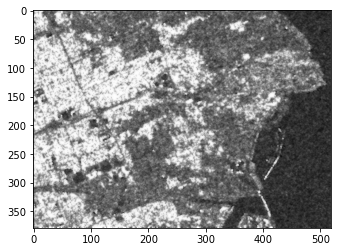

In [86]:
plt.imshow(img_output_hirosawa)
print(img_output_hirosawa.size)

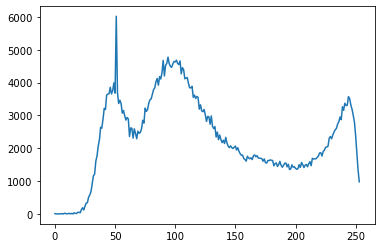

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
#img = cv2.imread(sar_img, 0)

# ヒストグラムの取得
img_hist, img_bins = np.histogram(np.array(img_output_hirosawa).flatten(), bins=np.arange(255))

# ヒストグラムの表示
plt.plot(img_hist)
plt.show()

---

In [ ]:
import ee
 
# Trigger the authentication flow.
ee.Authenticate()
 
# Initialize the library.
ee.Initialize()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline

---

In [17]:
from geotiff import GeoTiff

geo_tiff = GeoTiff("S1A_IW_GRDH_1SDV_20211228T210006_20211228T210031_041214_04E5DC_258C.SAFE/measurement/vh_geotiff.tif")

TypeError: can't multiply sequence by non-int of type 'float'

In [18]:
plt.imshow(geo_tiff)

NameError: name 'geo_tiff' is not defined

---

In [19]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

True

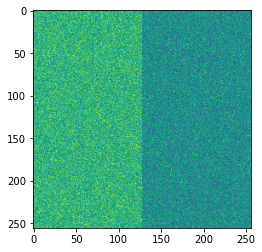

In [140]:
from pylab import *
import numpy as np
nimg = np.random.normal(0.5, 0.1, (256,256))
nimg[:,:128] += 0.15
# nimg[:50,:50] += 0.25
# nimg[50:,50:] += 0.25
# nimg[:,50:] += 0.25
imshow(nimg, vmin=0, vmax=1)
#imshow(lee_filter(nimg, 20), vmin=0, vmax=1, cmap='gray')
cv2.imwrite('image2.bmp', nimg)

In [141]:
from PIL import Image
import numpy as np

img_array1 = Image.open("image2.bmp")

print(img_array1.size)
print(img_array1)

(256, 256)
<PIL.BmpImagePlugin.BmpImageFile image mode=L size=256x256 at 0x1F92246A8B0>


In [142]:
import math

width, height = img_array1.size
print("横",width,"縦",height)

win_size = 5
#sig = 1/math.sqrt(1)
sig = 0.6
img_output = img_array1

add_width = win_size - 1
add_height = win_size - 1


#for num in range(win_size - 1):
    

# img_mean = uniform_filter(sar_img, (size, size))
# img_sqr_mean = uniform_filter(sar_img**2, (size, size))
# img_variance = img_sqr_mean - img_mean**2

# overall_variance = variance(sar_img)

# img_weights = img_variance / (img_variance + overall_variance)
# img_output = img_mean + img_weights * (img_array - img_mean)

r_tmp = [0]*win_size
g_tmp = [0]*win_size
b_tmp = [0]*win_size
a_tmp = [0]*win_size

print(r_tmp)

for y in range(height-win_size+1):
    #print("y:",y)
    y_tmp = y
    for x in range(width-win_size+1):
        #print(x)
        x_tmp = x
        
        r_sum = 0
        g_sum = 0
        b_sum = 0
        #a_sum = 0
        
        R_var_i_r = 0
        R_var_i_g = 0
        R_var_i_b = 0
        #R_var_i_a = 0
        
        for i in range(win_size):
            r_tmp[i], g_tmp[i], b_tmp[i] = img_array1.getpixel((x_tmp+i, y_tmp+i))
#             #print(i)
#             try:
#                 r_tmp[i], g_tmp[i], b_tmp[i], a_tmp[i] = img_array.getpixel((x_tmp+i, y_tmp+i))
#             except IndexError:
#                 outer_copy = img_array.getpixel((x_tmp, y_tmp))
#                 #print(outer_copy[3])
#                 for n in range(win_size-1):
#                     img_array.putpixel((x_tmp+n, y_tmp+n), (outer_copy[0], outer_copy[1], outer_copy[2], outer_copy[3])) 
            r_sum += r_tmp[i]
            g_sum += g_tmp[i]
            b_sum += b_tmp[i]
            #a_sum += a_tmp[i]
    
        r_avg = r_sum/win_size
        g_avg = g_sum/win_size
        b_avg = b_sum/win_size
        #a_avg = a_sum/win_size
    
        for j in range(win_size):
            R_var_i_r += (r_tmp[j] - r_avg)**2
            R_var_i_g += (g_tmp[j] - g_avg)**2
            R_var_i_b += (b_tmp[j] - b_avg)**2
            #R_var_i_a += (a_tmp[j] - a_avg)**2
    
        R_var_i_r /= win_size
        R_var_i_g /= win_size
        R_var_i_b /= win_size
        #R_var_i_a /= win_size
    
        R_var_r = (R_var_i_r - r_avg**2 * sig**2)
        R_var_g = (R_var_i_g - g_avg**2 * sig**2)
        R_var_b = (R_var_i_b - b_avg**2 * sig**2)
        #R_var_a = (R_var_i_a - a_avg**2 * sig**2)
        
        try:
            r_wei = R_var_r/math.floor(r_avg**2 * sig**2 + (1 + sig**2)*R_var_r)
        except ZeroDivisionError:
            r_wei = 0
            
        try:
            g_wei = R_var_g/math.floor(g_avg**2 * sig**2 + (1 + sig**2)*R_var_g)
        except ZeroDivisionError:
            g_wei = 0
            
        try:
            b_wei = R_var_b/math.floor(b_avg**2 * sig**2 + (1 + sig**2)*R_var_b)
        except ZeroDivisionError:
            b_wei = 0
            
#         try:
#             a_wei = R_var_a/math.floor(a_avg**2 * sig**2 + (1 + sig**2)*R_var_a)
#         except ZeroDivisionError:
#             a_wei = 0
    
        r_i, g_i, b_i, a_i = img_array.getpixel((x, y))
        R_r = r_avg + r_wei*(r_i - r_avg)
        R_g = g_avg + g_wei*(g_i - g_avg)
        R_b = b_avg + b_wei*(b_i - b_avg)
        #R_a = a_avg + a_wei*(a_i - a_avg)
        
        R_r = math.floor(R_r)
        R_g = math.floor(R_g)
        R_b = math.floor(R_b)
        #R_a = math.floor(R_a)
    
        img_output.putpixel((x, y), (R_r, R_g, R_b))

# var_r = (var_i - avg_i**2*sig**2)/(1+sig**2)

# b = var_r / (avg_i*sig + (1 + sig**2)*var_r)

# r = avg_r + b*(i-avg_r)



print(img_output)

横 256 縦 256
[0, 0, 0, 0, 0]


TypeError: cannot unpack non-iterable int object

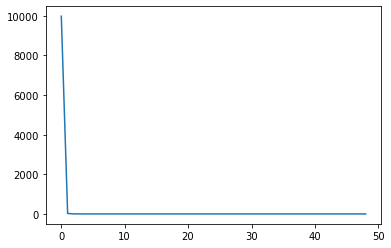

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
#img = cv2.imread(sar_img, 0)

# ヒストグラムの取得
nhist, nbins = np.histogram(np.array(nimg).flatten(), bins=np.arange(50))

# ヒストグラムの表示
plt.plot(nhist)
plt.show()

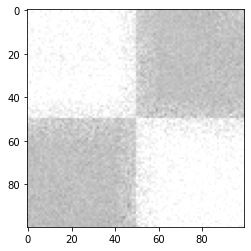

In [26]:
imshow(lee_filter(nimg, 20), vmin=0, vmax=1, cmap='gray')

---

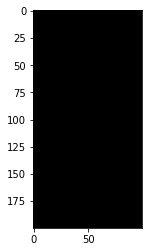

In [32]:
import cv2
import numpy as np
 
#ブランク画像
height = 200
width = 100
bk_img = np.zeros((height, width, 3))

plt.imshow(bk_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


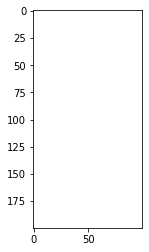

In [34]:
import cv2
import numpy as np
 
#ブランク画像
height = 200
width = 100
wt_img = np.zeros((height, width, 3))
wt_img += 255

plt.imshow(wt_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


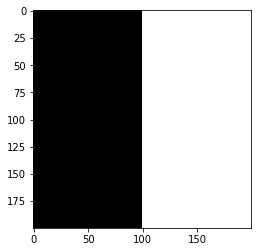

In [35]:
img_comb = cv2.hconcat([bk_img, wt_img])

plt.imshow(img_comb)

In [39]:
x = 5
print(math.floor(5/2))

2
